# **Customer Lifetime Value**

Final Project by Michael Jacob Ephariem Jehuda

<p align="center">
<img src="https://play-lh.googleusercontent.com/eLn6Svquso2kBcoMFvuO9EEjHF9i7aaUr-rwedUOSl4FwrNWX8tqhZBLr1nWDSZkNQ=w720-h310-rw" srcset="https://play-lh.googleusercontent.com/eLn6Svquso2kBcoMFvuO9EEjHF9i7aaUr-rwedUOSl4FwrNWX8tqhZBLr1nWDSZkNQ=w1440-h620-rw 2x" class="T75of DYfLw" aria-hidden="true" data-atf="false" data-iml="791">
</p>

# **Business background**



*   The olist store is a sales model in which your products are displayed and marketed within olist on the largest marketplaces in Brazil and other relevant e-commerces.


*   The olist store understand that customers are their most important asset and that it is imperative to estimate the potential value of this asset. 


*   Currently, there is an escalating demand for web services and web applications, along with continuous growth in worldwide commercial application. the olist store realize that they must be able to measure the value of their web customers, i.e. the expected profit that will be derived from the relationship with web customers from the present until a specified period in the future. 


*   So to solve this problem issues the olist store need The ability to accurately predict value of a company’s customers that has a large impact to achieve long-term gain.




# **Problem Statement**

- which customers have the highest spend probability in next 365-days?

- whats your action and recomenddation for customer churn?

- which customers have the lowest spend probability in next 365-days


# Import Library & Load Dataset

In [ ]:
!pip install lifetimes

     |████████████████████████████████| 584 kB 5.0 MB/s 


In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import xlrd
import pandas as pd
import datetime
import lifetimes

from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.plotting import *
from sklearn.metrics import mean_squared_error
from math import sqrt
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
import pickle
import warnings
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")
sns.set_theme(style = "darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Final Project Dibimbing

/content/gdrive/MyDrive/Colab Notebooks/Final Project Dibimbing


In [ ]:
df_customers = pd.read_csv("olist_customers_dataset.csv")
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')



In [ ]:
df_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


# Data Cleaning

## Delete unecessary column

In [ ]:
customers=df_customers[['customer_id','customer_unique_id','customer_city']].set_index('customer_id')
customers

,customer_unique_id,customer_city
customer_id,,
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas
...,...,...
17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo
e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra
5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza


In [ ]:
orders=df_orders[['order_id','customer_id','order_purchase_timestamp']]
orders = pd.merge(orders,customers,'inner','customer_id')
orders

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre
...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba


In [ ]:
df_items.drop_duplicates('order_id',keep='first',inplace=True)
transaction = pd.merge(orders,df_items,'inner','order_id')
# transaction = transaction[['customer_unique_id','order_purchase_timestamp','price']]
# transaction.drop_duplicates('order_id',keep='first',inplace=True)
transaction

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_city,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...
98661,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,1,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08
98662,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
98663,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
98664,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


## General Information

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 98665
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  98666 non-null  object 
 1   customer_id               98666 non-null  object 
 2   order_purchase_timestamp  98666 non-null  object 
 3   customer_unique_id        98666 non-null  object 
 4   customer_city             98666 non-null  object 
 5   order_item_id             98666 non-null  int64  
 6   product_id                98666 non-null  object 
 7   seller_id                 98666 non-null  object 
 8   shipping_limit_date       98666 non-null  object 
 9   price                     98666 non-null  float64
 10  freight_value             98666 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.0+ MB


## Changing Data Type

In [ ]:
transaction ['order_purchase_timestamp'] = pd.to_datetime(transaction['order_purchase_timestamp'])
transaction ['order_date'] = transaction.order_purchase_timestamp.dt.date 
transaction['order_date'] = pd.to_datetime(transaction['order_date'])
transaction.drop(["order_purchase_timestamp"], axis = 1, inplace = True) 
transaction.head()

,order_id,customer_id,customer_unique_id,customer_city,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,2018-02-13


In [ ]:
transaction['shipping_limit_date'] = pd.to_datetime(transaction['shipping_limit_date'])
transaction['shipping_date'] = transaction.shipping_limit_date.dt.date 
transaction['shipping_date'] = pd.to_datetime(transaction['shipping_date'])
transaction.drop(["shipping_limit_date"], axis = 1, inplace = True) 
transaction.head()

,order_id,customer_id,customer_unique_id,customer_city,order_item_id,product_id,seller_id,price,freight_value,order_date,shipping_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,sao paulo,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,2017-10-02,2017-10-06
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,barreiras,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,2018-07-24,2018-07-30
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22,2018-08-08,2018-08-13
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20,2017-11-18,2017-11-23
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72,2018-02-13,2018-02-19


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98666 entries, 0 to 98665
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            98666 non-null  object        
 1   customer_id         98666 non-null  object        
 2   customer_unique_id  98666 non-null  object        
 3   customer_city       98666 non-null  object        
 4   order_item_id       98666 non-null  int64         
 5   product_id          98666 non-null  object        
 6   seller_id           98666 non-null  object        
 7   price               98666 non-null  float64       
 8   freight_value       98666 non-null  float64       
 9   order_date          98666 non-null  datetime64[ns]
 10  shipping_date       98666 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(6)
memory usage: 9.0+ MB


## checking missing values

In [ ]:
transaction.isna().sum()

order_id              0
customer_id           0
customer_unique_id    0
customer_city         0
order_item_id         0
product_id            0
seller_id             0
price                 0
freight_value         0
order_date            0
shipping_date         0
dtype: int64

## Checking Duplicate Data

In [ ]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {transaction.shape[0]}")

transaction = transaction.drop_duplicates(keep='first').reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {transaction.shape[0]}")

Dataframe dimension before duplication drop 98666
Dataframe dimension after duplication drop 98666


#Checking Outliers

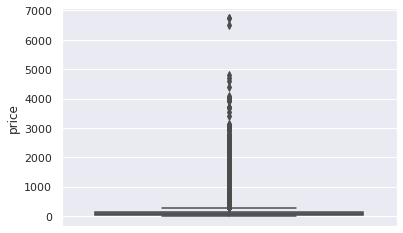

In [ ]:
sns.boxplot(data=transaction,y="price")

# Exploratory Data Analysis

In [ ]:
transaction_price=transaction[['order_id','customer_unique_id','order_date','price','customer_city','product_id']]
transaction_customer =transaction_price.groupby(['order_id','customer_unique_id', 'order_date','customer_city','product_id'])["price"].agg(['count', 'sum']).rename(columns = {'count':'quantity','sum':'total price'}).reset_index()
transaction_customer.sort_values('quantity',ascending=False)

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90
65713,ab13cb6c13063f2603a94c9ddca34f66,dda7d094a7c887911a9f6cadf698c5b9,2018-01-16,rondonopolis,038e3a669bb495e56d9d609d874fb668,1,1599.00
65783,ab3a669dbdc7a8d447bb6fc7a158cf94,c2e971c4b49f34cd0dd4c155c1d541a5,2018-07-20,santa cruz das palmeiras,4fa0d1019affe5fe2c492c00422f01d8,1,24.90
65782,ab3a6663f21c1a36401300460d3c41cd,9b1c978cb21b066c8cb29a12c846a8c5,2017-10-25,jaboatao dos guararapes,f3c39c81e52f6b07a486fb78d90dbfef,1,539.00
65781,ab3a0535e202529923e53dfdadf8042e,8dc630bd7459952cad4618716320c24e,2018-04-26,belo horizonte,bdcf6a834e8faa30dac3886c7a58e92e,1,35.90
...,...,...,...,...,...,...,...
32886,5561adcb0fd46da4cad3048fa4e7fc00,87d406e4698a66118241f1f4a407ee03,2018-06-25,sao paulo,4d071a22b9cc548b64a75075a4c63151,1,99.90
32885,555e60e282181725debc9eb2d69fda3f,253ba0a753f158c30d832404fd363ea6,2018-06-05,sao paulo,79c716797a31592b8dbe45b2a93a835f,1,11.99
32884,555e4d40fb6beea866d46eb6a5a01b41,7d15b5b3609f450652ddc385d624a2cc,2017-09-17,sao paulo,83d199d296c44101c8c3b5c9c0cce9ea,1,69.99
32883,555e1afa0cf180760b7ea9f6d8ebc329,b01b4873885544bd7cf29c9a355d0bcf,2018-04-29,palhoca,2c715979f8471e42e0daeeb855f04f9c,1,119.00


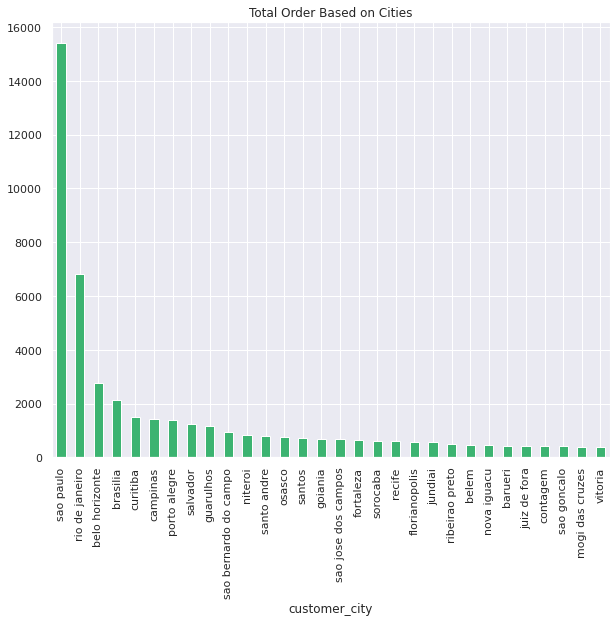

In [ ]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
plt.title("Total Order Based on Cities")
transaction_customer.groupby("customer_city").sum().sort_values(by = "quantity", ascending = False).head(30)["quantity"].plot(kind = "bar", color = 'mediumseagreen')

In [ ]:
temp_data = transaction_customer.copy()
temp_data

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,santa fe do sul,e5f2d52b802189ee658865ca93d83a8f,1,239.90
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14,para de minas,c777355d18b72b67abbeef9df44fd0fd,1,199.00
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08,atibaia,7634da152a4610f1595efa32f14722fc,1,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04,varzea paulista,ac6c3623068f30de03045865e4e10089,1,199.90
...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23,sao luis,4aa6014eceb682077f9dc4bffebc05b0,1,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14,curitiba,32e07fd915822b0765e448c4dd74c828,1,350.00
98663,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23,sao paulo,72a30483855e2eafc67aee5dc2560482,1,99.90
98664,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14,vinhedo,9c422a519119dcad7575db5af1ba540e,1,55.99


In [ ]:
#Date Time Analysis
temp_data.loc[:, "Month"] = transaction_customer.order_date.dt.month
temp_data.loc[:, "Time"] = transaction_customer.order_date.dt.time
temp_data.loc[:, "Year"] = transaction_customer.order_date.dt.year
temp_data.loc[:, "Day"] = transaction_customer.order_date.dt.day
temp_data.loc[:, "Quarter"] = transaction_customer.order_date.dt.quarter
temp_data.loc[:, "Day of Week"] = transaction_customer.order_date.dt.dayofweek

In [ ]:
temp_data

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price,Month,Time,Year,Day,Quarter,Day of Week
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90,9,00:00:00,2017,13,3,2
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,santa fe do sul,e5f2d52b802189ee658865ca93d83a8f,1,239.90,4,00:00:00,2017,26,2,2
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14,para de minas,c777355d18b72b67abbeef9df44fd0fd,1,199.00,1,00:00:00,2018,14,1,6
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08,atibaia,7634da152a4610f1595efa32f14722fc,1,12.99,8,00:00:00,2018,8,3,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04,varzea paulista,ac6c3623068f30de03045865e4e10089,1,199.90,2,00:00:00,2017,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23,sao luis,4aa6014eceb682077f9dc4bffebc05b0,1,299.99,4,00:00:00,2018,23,2,0
98662,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14,curitiba,32e07fd915822b0765e448c4dd74c828,1,350.00,7,00:00:00,2018,14,3,5
98663,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23,sao paulo,72a30483855e2eafc67aee5dc2560482,1,99.90,10,00:00:00,2017,23,4,0
98664,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14,vinhedo,9c422a519119dcad7575db5af1ba540e,1,55.99,8,00:00:00,2017,14,3,0


In [ ]:

#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

In [ ]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)
temp_data

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price,Month,Time,Year,Day,Quarter,Day of Week
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90,9,00:00:00,2017,13,3,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,santa fe do sul,e5f2d52b802189ee658865ca93d83a8f,1,239.90,4,00:00:00,2017,26,2,Wednesday
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14,para de minas,c777355d18b72b67abbeef9df44fd0fd,1,199.00,1,00:00:00,2018,14,1,Sunday
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08,atibaia,7634da152a4610f1595efa32f14722fc,1,12.99,8,00:00:00,2018,8,3,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04,varzea paulista,ac6c3623068f30de03045865e4e10089,1,199.90,2,00:00:00,2017,4,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23,sao luis,4aa6014eceb682077f9dc4bffebc05b0,1,299.99,4,00:00:00,2018,23,2,Monday
98662,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14,curitiba,32e07fd915822b0765e448c4dd74c828,1,350.00,7,00:00:00,2018,14,3,Saturday
98663,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23,sao paulo,72a30483855e2eafc67aee5dc2560482,1,99.90,10,00:00:00,2017,23,4,Monday
98664,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14,vinhedo,9c422a519119dcad7575db5af1ba540e,1,55.99,8,00:00:00,2017,14,3,Monday


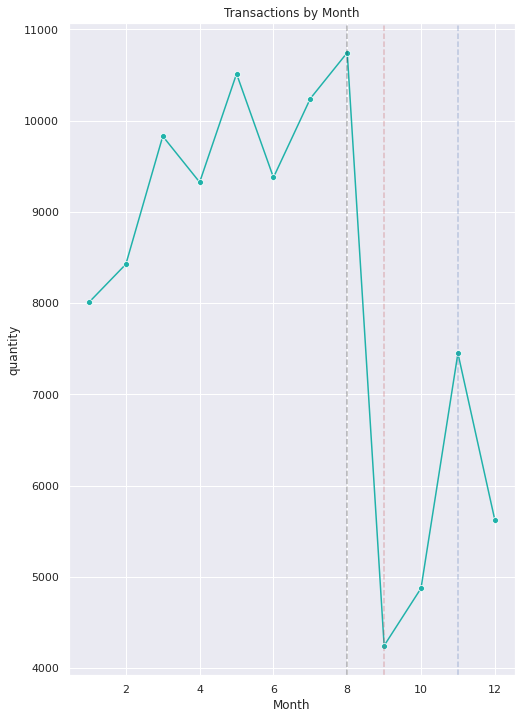

In [ ]:
plt.figure(figsize=(8,12))
# plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "quantity", data = temp_data.groupby("Month").sum("quantity"), marker = "o", color = "lightseagreen")
plt.axvline(8, color = "k", linestyle = '--', alpha = 0.3)
plt.axvline(9, color = 'r', linestyle = '--', alpha = 0.3)
plt.axvline(11, color = 'b', linestyle = '--', alpha = 0.3)
# plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.show()

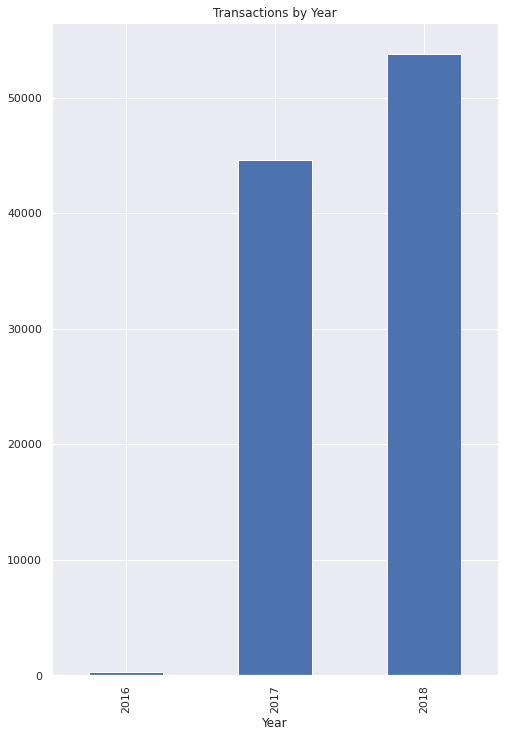

In [ ]:
plt.figure(figsize=(8,12))
# plt.subplot(3,2,2)
temp_data.groupby("Year").sum()["quantity"].plot(kind = "bar")
plt.title("Transactions by Year")
plt.show()

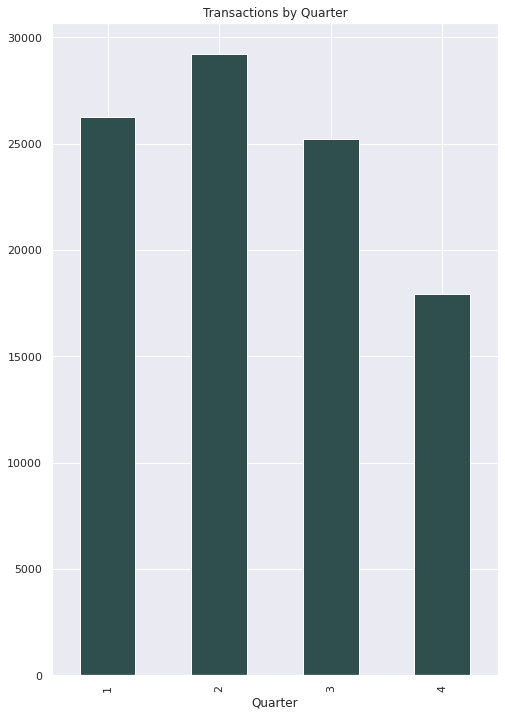

In [ ]:
plt.figure(figsize=(8,12))
# plt.subplot(3,2,3)
temp_data.groupby("Quarter").sum()["quantity"].plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.show()

In [ ]:
temp_data.groupby("Day").sum("quantity")

,quantity,total price,Month,Year,Quarter
Day,,,,,
1,3080,408210.51,19256,6214057,7314
2,3186,399852.12,18851,6428053,7370
3,3254,415594.78,20051,6565209,7821
4,3459,459167.84,21403,6978681,8316
5,3412,432452.15,20515,6883834,7980
6,3425,443101.49,21005,6910048,8078
7,3330,423694.81,19840,6718479,7655
8,3298,397646.37,19423,6653928,7554
9,3239,423666.94,19142,6534900,7528


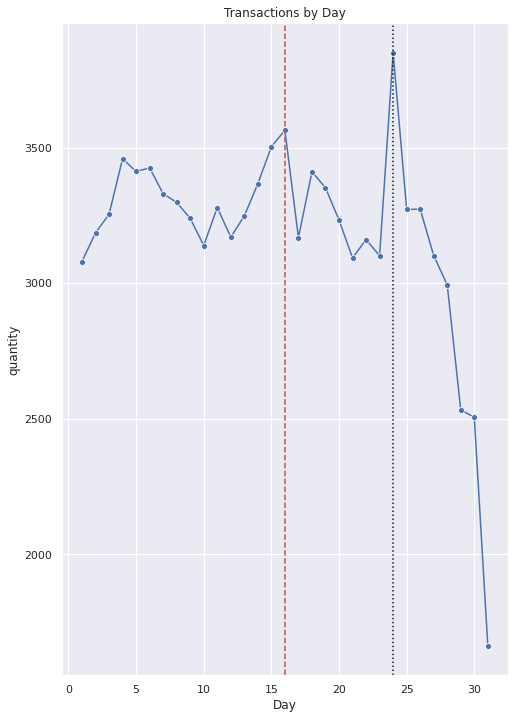

In [ ]:
plt.figure(figsize=(8,12))
# plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "quantity", data = temp_data.groupby("Day").sum("quantity"), marker = "o", )
plt.axvline(16, color = 'r', linestyle = '--')
plt.axvline(24, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.show()

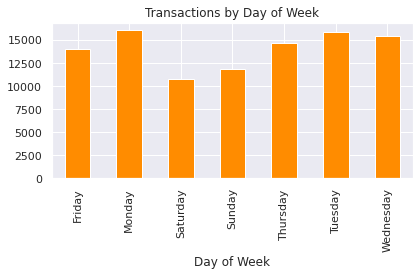

In [ ]:
# plt.subplot(3,2,5)
temp_data.groupby("Day of Week").sum()["quantity"].plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

In [ ]:
temp_data

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price,Month,Time,Year,Day,Quarter,Day of Week
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90,9,00:00:00,2017,13,3,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04-26,santa fe do sul,e5f2d52b802189ee658865ca93d83a8f,1,239.90,4,00:00:00,2017,26,2,Wednesday
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01-14,para de minas,c777355d18b72b67abbeef9df44fd0fd,1,199.00,1,00:00:00,2018,14,1,Sunday
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08-08,atibaia,7634da152a4610f1595efa32f14722fc,1,12.99,8,00:00:00,2018,8,3,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02-04,varzea paulista,ac6c3623068f30de03045865e4e10089,1,199.90,2,00:00:00,2017,4,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,0c9aeda10a71f369396d0c04dce13a64,2018-04-23,sao luis,4aa6014eceb682077f9dc4bffebc05b0,1,299.99,4,00:00:00,2018,23,2,Monday
98662,fffcd46ef2263f404302a634eb57f7eb,0da9fe112eae0c74d3ba1fe16de0988b,2018-07-14,curitiba,32e07fd915822b0765e448c4dd74c828,1,350.00,7,00:00:00,2018,14,3,Saturday
98663,fffce4705a9662cd70adb13d4a31832d,cd79b407828f02fdbba457111c38e4c4,2017-10-23,sao paulo,72a30483855e2eafc67aee5dc2560482,1,99.90,10,00:00:00,2017,23,4,Monday
98664,fffe18544ffabc95dfada21779c9644f,eb803377c9315b564bdedad672039306,2017-08-14,vinhedo,9c422a519119dcad7575db5af1ba540e,1,55.99,8,00:00:00,2017,14,3,Monday


In [ ]:
print("Total Number of Customer City in 2016: {}".format(len(temp_data[temp_data["Year"] == 2016]["customer_city"].unique())))
print("Total Number of Transactions in 2016: {}".format(temp_data[temp_data["Year"] == 2016]["quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Customer City in 2017: {}".format(len(temp_data[temp_data["Year"] == 2017]["customer_city"].unique())))
print("Total Number of Transactions in 2017: {}".format(temp_data[temp_data["Year"] == 2017]["quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Customer City in 2018: {}".format(len(temp_data[temp_data["Year"] == 2018]["customer_city"].unique())))
print("Total Number of Transactions in 2018: {}".format(temp_data[temp_data["Year"] == 2018]["quantity"].sum()))

Total Number of Customer City in 2016: 173
Total Number of Transactions in 2016: 312
--------------------------------------------
Total Number of Customer City in 2017: 3273
Total Number of Transactions in 2017: 44579
--------------------------------------------
Total Number of Customer City in 2018: 3276
Total Number of Transactions in 2018: 53775


# EDA Insight

1) 5 city with the best sales are sao paulo,rio de janeiro,belo horizonte,brasilia,curitiba.

2) Most Transactions happened in the month of August which is evident due to festive seasons.

3) 2018 is the year in which we have the most transactions followed by the 2017

4) Q2 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on monday followed by Tuesday and Wednesday.

# RFM Analysis |(Recency, Frequency, Monetary)

*   frequency: _ of days in which a customer made a repeat purchase
*   T: customer's age in days
*   recency: customer's age in days at time of most recent purchase
*   monetary_value: mean of a customer's purchases, excluding the 1st purchase


In [ ]:
transaction_customer.sort_values('quantity',ascending=False)

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09-13,campos dos goytacazes,4244733e06e7ecb4970a6e2683c13e61,1,58.90
65713,ab13cb6c13063f2603a94c9ddca34f66,dda7d094a7c887911a9f6cadf698c5b9,2018-01-16,rondonopolis,038e3a669bb495e56d9d609d874fb668,1,1599.00
65783,ab3a669dbdc7a8d447bb6fc7a158cf94,c2e971c4b49f34cd0dd4c155c1d541a5,2018-07-20,santa cruz das palmeiras,4fa0d1019affe5fe2c492c00422f01d8,1,24.90
65782,ab3a6663f21c1a36401300460d3c41cd,9b1c978cb21b066c8cb29a12c846a8c5,2017-10-25,jaboatao dos guararapes,f3c39c81e52f6b07a486fb78d90dbfef,1,539.00
65781,ab3a0535e202529923e53dfdadf8042e,8dc630bd7459952cad4618716320c24e,2018-04-26,belo horizonte,bdcf6a834e8faa30dac3886c7a58e92e,1,35.90
...,...,...,...,...,...,...,...
32886,5561adcb0fd46da4cad3048fa4e7fc00,87d406e4698a66118241f1f4a407ee03,2018-06-25,sao paulo,4d071a22b9cc548b64a75075a4c63151,1,99.90
32885,555e60e282181725debc9eb2d69fda3f,253ba0a753f158c30d832404fd363ea6,2018-06-05,sao paulo,79c716797a31592b8dbe45b2a93a835f,1,11.99
32884,555e4d40fb6beea866d46eb6a5a01b41,7d15b5b3609f450652ddc385d624a2cc,2017-09-17,sao paulo,83d199d296c44101c8c3b5c9c0cce9ea,1,69.99
32883,555e1afa0cf180760b7ea9f6d8ebc329,b01b4873885544bd7cf29c9a355d0bcf,2018-04-29,palhoca,2c715979f8471e42e0daeeb855f04f9c,1,119.00


In [ ]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(transaction_customer, "customer_unique_id", "order_date", "total price",)
rfm_summary

,frequency,recency,T,monetary_value
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,116.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,119.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,542.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,326.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,293.0,0.0
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,452.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,267.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,573.0,0.0


In [ ]:
rfm_summary.describe()

,frequency,recency,T,monetary_value
count,95420.000000,95420.000000,95420.000000,95420.000000
mean,0.024198,2.683389,246.184846,2.474897
std,0.178936,25.263074,153.656402,26.579606
min,0.000000,0.000000,5.000000,0.000000
25%,0.000000,0.000000,122.000000,0.000000
50%,0.000000,0.000000,227.000000,0.000000
75%,0.000000,0.000000,356.000000,0.000000
max,15.000000,633.000000,729.000000,1999.990000


In [ ]:
rfm_summary.reset_index(inplace = True)


In [ ]:
rfm_summary[rfm_summary['frequency']>0].head(10)


,customer_unique_id,frequency,recency,T,monetary_value
106,004288347e5e88a27ded2bb23747066c,1.0,171.0,403.0,87.90
123,004b45ec5c64187465168251cd1c9c2f,1.0,267.0,367.0,27.00
143,0058f300f57d7b93c477a131a59b36c3,1.0,31.0,196.0,72.58
246,00a39521eb40f7012db50455bf083460,1.0,11.0,103.0,11.55
410,011575986092c30523ecb71ff10cb473,1.0,60.0,198.0,63.90
425,011b4adcd54683b480c4d841250a987f,1.0,177.0,377.0,56.97
434,012452d40dafae4df401bced74cdb490,1.0,330.0,442.0,330.00
444,012a218df8995d3ec3bb221828360c86,1.0,42.0,119.0,1369.90
473,013ef03e0f3f408dd9bf555e4edcdc0a,1.0,29.0,74.0,59.90
475,013f4353d26bb05dc6652f1269458d8d,1.0,4.0,283.0,64.00


In [ ]:
transaction_customer[transaction_customer['customer_unique_id']=='0178b244a5c281fb2ade54038dd4b161']

,order_id,customer_unique_id,order_date,customer_city,product_id,quantity,total price
56994,94ca38619d7e64f94facac403a99682d,0178b244a5c281fb2ade54038dd4b161,2018-07-28,novo horizonte,05df88a280f9c6edca3b2f5f9b3e75ad,1,91.0
64152,a72698cb5818851e1f19815692cf256b,0178b244a5c281fb2ade54038dd4b161,2017-05-10,guaratingueta,99a4788cb24856965c36a24e339b6058,1,89.9


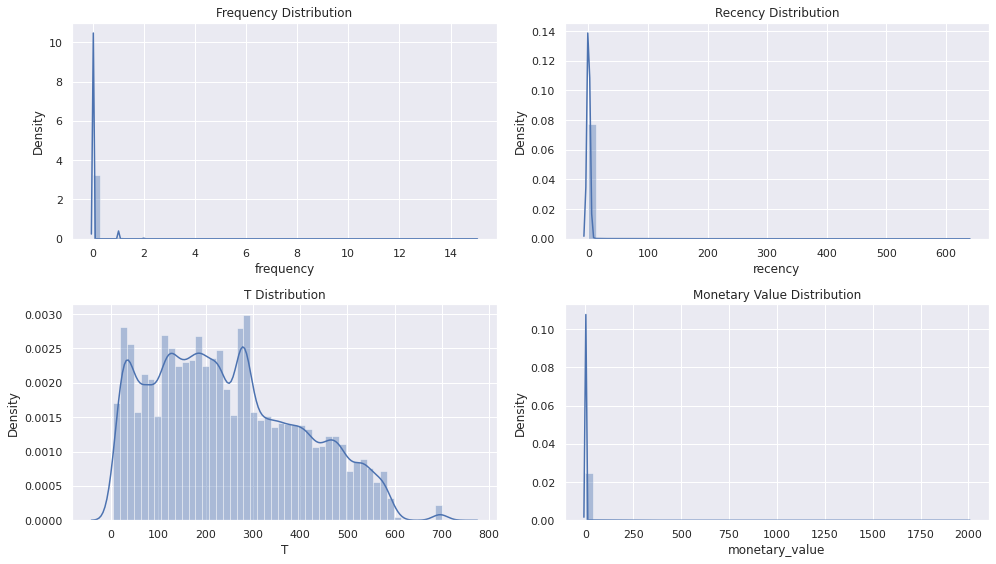

In [ ]:

#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

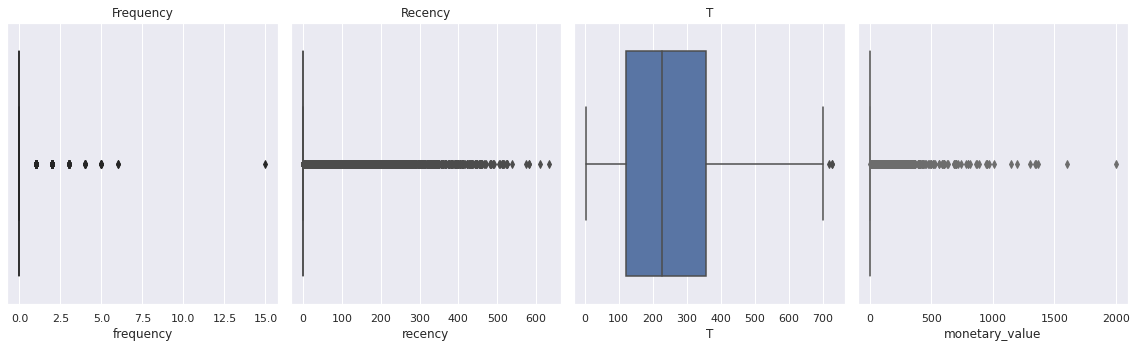

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [ ]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

,frequency,recency,T,monetary_value
count,95420.000000,95420.000000,95420.000000,95420.000000
mean,0.024198,2.683389,246.184846,2.474897
std,0.178936,25.263074,153.656402,26.579606
min,0.000000,0.000000,5.000000,0.000000
1%,0.000000,0.000000,14.000000,0.000000
10%,0.000000,0.000000,47.000000,0.000000
25%,0.000000,0.000000,122.000000,0.000000
50%,0.000000,0.000000,227.000000,0.000000
75%,0.000000,0.000000,356.000000,0.000000
90%,0.000000,0.000000,474.000000,0.000000


In [ ]:
#checking for the values containing zero.

print("Total Number of Frequency with 0: %s" % (len(rfm_summary[rfm_summary["frequency"] == 0])))
print("Total Number of Recency with 0: %s" % (len(rfm_summary[rfm_summary["recency"] == 0])))
print("Total Number of Monetary Value with 0: %s" % (len(rfm_summary[rfm_summary["monetary_value"] == 0])))

Total Number of Frequency with 0: 93335
Total Number of Recency with 0: 93335
Total Number of Monetary Value with 0: 93335


# Data Modelling

## Pareto - Negative Binom Distribution + Gamma Gamma Distribution Model

The core assumptions for the transaction Pareto/NBD
submodel are:
1. While alive, the number of transactions made by a customer follows a Poisson process.
2. Customer’s unobserved lifetime is exponentially distributed.
3. Heterogeneity in transaction rates across all customers follows a gamma distribution.
4. Heterogeneity in dropout rates across all customers follows a gamma distribution.
5. The transaction rate and dropout rate vary independently across customers.

This article uses the Gamma-Gamma spending submodel described in, further clarified
It assumes the following:
1. The monetary value of a customer’s transaction varies randomly around their average
order value.
2. Average transaction values vary across customers but do not vary over time for any
given individual.
3. The distribution of average transaction values across customers is independent of the
transaction process.

In [ ]:
summary_pnbd = rfm_summary.copy()


In [ ]:
summary_pnbd.shape


(95420, 5)

In [ ]:
pareto_nbd = ParetoNBDFitter(penalizer_coef = 0.0)
pareto_nbd.fit(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

<lifetimes.ParetoNBDFitter: fitted with 95420 subjects, alpha: 1853.94, beta: 5.85, r: 0.64, s: 0.45>

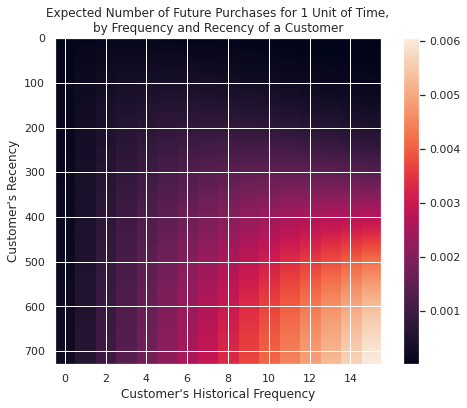

In [ ]:
plt.figure(figsize=(8,6))
plot_frequency_recency_matrix(pareto_nbd)

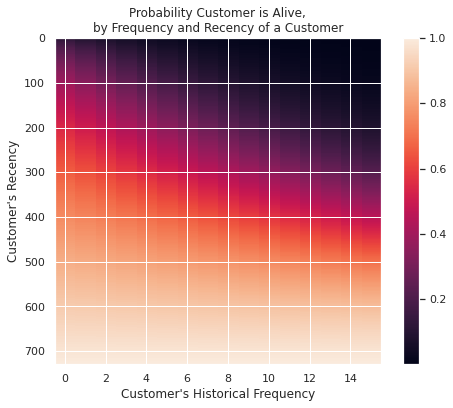

In [ ]:
plt.figure(figsize=(8,6))
plot_probability_alive_matrix(pareto_nbd)

In [ ]:
summary_pnbd["p_not_alive"] = 1-pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])
summary_pnbd["p_alive"] = pareto_nbd.conditional_probability_alive(summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [ ]:
t = 365
summary_pnbd["predicted_purchases"] = pareto_nbd.conditional_expected_number_of_purchases_up_to_time(t, summary_pnbd["frequency"], summary_pnbd["recency"], summary_pnbd["T"])

In [ ]:
summary_pnbd.sort_values(by = "predicted_purchases").tail(5)

,customer_unique_id,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
37320,63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,480.0,62.772000,0.107802,0.892198,0.687819
37532,6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,349.0,106.880000,0.097296,0.902704,0.709609
82305,dc813062e0fc23409cd255f7f53c7074,5.0,418.0,429.0,75.552000,0.011569,0.988431,0.769240
75560,ca77025e7201e3b30c44b472ff346268,6.0,235.0,329.0,66.126667,0.157330,0.842670,0.780812
52597,8d50f5eadf50201ccdcedfb9e2ac8455,15.0,462.0,476.0,47.642000,0.013756,0.986244,2.110177


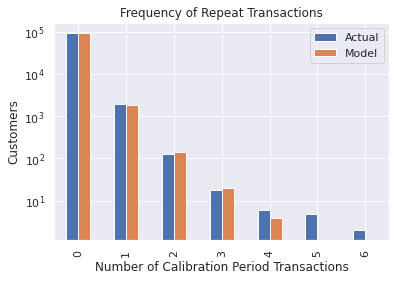

In [ ]:
plot_period_transactions(pareto_nbd).set_yscale('log')

We can see that our actual data and our simulated data line up well. The model is fairly representative of the real data up until seven repeat transactions. There are few customers who make more purchases.

In [ ]:
summary_cal_holdout = calibration_and_holdout_data(transaction_customer, 'customer_unique_id', 'order_date',calibration_period_end='2017-09-03', observation_period_end='2018-09-03' )

### Cumulative transaction plot

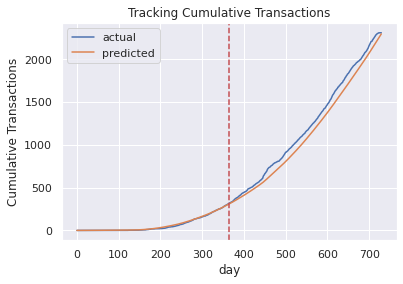

In [ ]:
# pareto_nbd.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_cumulative_transactions(pareto_nbd, transaction_customer, 'order_date', 'customer_unique_id', 730, 365)

The red line represents the boundary between the calibration period on the left and the holdout period on the right. As you can see, the Pareto/NBD model is good at predicting cumulative transactions.


### Incremental transaction plot

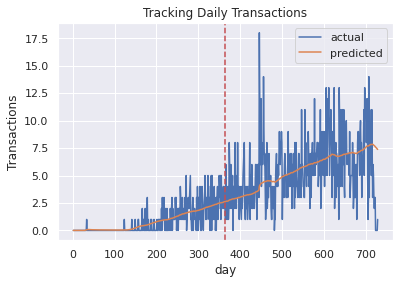

In [ ]:
plot_incremental_transactions(pareto_nbd, transaction_customer, 'order_date', 'customer_unique_id', 730, 365);


This plot shows that the model does a decent job capturing general trends in the data.


### Conditional expectations plot

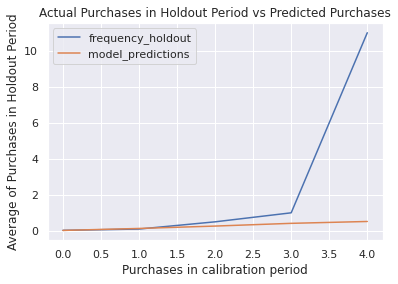

In [ ]:
plot_calibration_purchases_vs_holdout_purchases(pareto_nbd, summary_cal_holdout)

The model performs well up to three calibration period purchases, but diverges from the holdout data because of the distribution of the data.


In [ ]:
summary_pnbd

,customer_unique_id,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,116.0,0.0,0.749358,0.250642,0.020628
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,119.0,0.0,0.752255,0.247745,0.020471
2,0000f46a3911fa3c0805444483337064,0.0,0.0,542.0,0.0,0.884915,0.115085,0.009928
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,326.0,0.0,0.848173,0.151827,0.013556
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,293.0,0.0,0.839563,0.160437,0.014327
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,452.0,0.0,0.872566,0.127434,0.011204
95416,fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,267.0,0.0,0.831793,0.168207,0.014996
95417,ffff371b4d645b6ecea244b27531430a,0.0,0.0,573.0,0.0,0.888534,0.111466,0.009545
95418,ffff5962728ec6157033ef9805bacc48,0.0,0.0,124.0,0.0,0.756873,0.243127,0.020214


In [ ]:
#Creating a function which can predict the future purchased value based on the lookup window

def pareto_get_pred_error(t, id_):
    
    individual_p = summary_pnbd[summary_pnbd["customer_unique_id"] == id_]
    
    ind_pred_p = pareto_nbd.predict(t, individual_p["frequency"], individual_p["recency"], individual_p["T"])
    
    actual_val_p = individual_p["frequency"]/individual_p["recency"]*t
    
    error = actual_val_p - ind_pred_p
    
    print("Your Predicted Purchase: %s" % (ind_pred_p))
    print("Your Actual Purchase: %s" % (actual_val_p))
    print("Prediction Error: %s" % (error))

In [ ]:
summary_pnbd["actual_365_p"] = summary_pnbd["frequency"]/summary_pnbd["recency"]*365


In [ ]:
summary_pnbd["actual_365_p"].fillna(0, inplace = True)


In [ ]:
summary_pnbd["p_error"] = summary_pnbd["actual_365_p"]-summary_pnbd["predicted_purchases"]


In [ ]:

def get_metrics(true, predicted, error):
    
    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))
    print("Average Purchase Error: %s" %(summary_pnbd["p_error"].mean()))
    
    sns.scatterplot(true, predicted, size = error, color = "darkolivegreen")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squared Error: 86.2185341097792
Root Mean Squared Error: 9.285393589384308
R2 Score: -0.0021397604061359488
Average Purchase Error: 0.4804006109545974


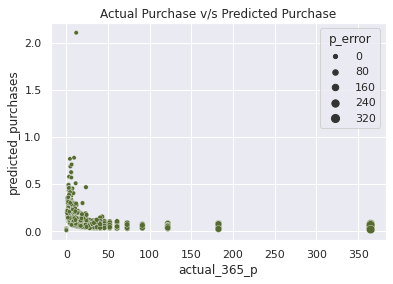

In [ ]:
get_metrics(summary_pnbd["actual_365_p"], summary_pnbd["predicted_purchases"], summary_pnbd["p_error"])


In [ ]:
pareto_mse_purchase = mean_squared_error(summary_pnbd["actual_365_p"], summary_pnbd["predicted_purchases"])
pareto_rmse_purchase = sqrt(mean_squared_error(summary_pnbd["actual_365_p"], summary_pnbd["predicted_purchases"]))
pareto_avg_error_purchase = summary_pnbd["p_error"].mean()

In [ ]:

summary_copy = summary_pnbd.copy()

In [ ]:
summary_copy = summary_copy[(summary_copy["frequency"] > 0) & (summary_copy["monetary_value"] > 0)]


The model we are going to use to estimate the CLV for our data is called the Gamma-Gamma submodel, which relies upon an important assumption.

The Gamma-Gamma submodel assumes that there is no relationship between the monetary value and the purchase frequency. In practice we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

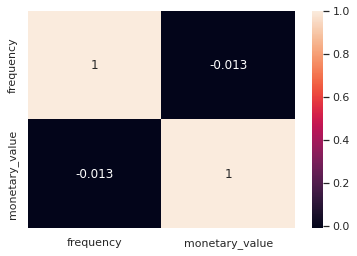

In [ ]:
sns.heatmap(summary_copy[["frequency", "monetary_value"]].corr(), annot = True)


In [ ]:
ggf_p = lifetimes.GammaGammaFitter(penalizer_coef = 0.0)


In [ ]:
ggf_p.fit(summary_copy["frequency"], summary_copy["monetary_value"])


<lifetimes.GammaGammaFitter: fitted with 2085 subjects, p: 2.98, q: 2.90, v: 72.16>

In [ ]:
ggf_p.summary


,coef,se(coef),lower 95% bound,upper 95% bound
p,2.977437,0.226051,2.534378,3.420496
q,2.900954,0.204591,2.499955,3.301952
v,72.164356,11.407650,49.805361,94.523350


In [ ]:
summary_copy["expected_avg_sales_p"] = ggf_p.conditional_expected_average_profit(summary_copy["frequency"],
                                                                        summary_copy["monetary_value"])

In [ ]:
summary_copy.head()


,customer_unique_id,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual_365_p,p_error,expected_avg_sales_p
106,004288347e5e88a27ded2bb23747066c,1.0,171.0,403.0,87.90,0.336332,0.663668,0.150772,2.134503,1.983731,97.692367
123,004b45ec5c64187465168251cd1c9c2f,1.0,267.0,367.0,27.00,0.135218,0.864782,0.197331,1.367041,1.169711,60.523160
143,0058f300f57d7b93c477a131a59b36c3,1.0,31.0,196.0,72.58,0.556861,0.443139,0.099574,11.774194,11.674620,88.342084
246,00a39521eb40f7012db50455bf083460,1.0,11.0,103.0,11.55,0.580184,0.419816,0.086865,33.181818,33.094954,51.093534
410,011575986092c30523ecb71ff10cb473,1.0,60.0,198.0,63.90,0.414638,0.585362,0.131639,6.083333,5.951695,83.044404


In [ ]:
avg_purchase_error = summary_copy["monetary_value"].mean() - summary_copy["expected_avg_sales_p"].mean()

In [ ]:

print("Actual Avg Sales: %s" % summary_copy["monetary_value"].mean())
print("Predicted Avg Sales: %s" % summary_copy["expected_avg_sales_p"].mean())
print("Mean Sqaured Error: %s" % mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"]))
print("Root Mean Sqaured Error: %s" % sqrt(mean_squared_error(summary_copy["monetary_value"], summary_copy["expected_avg_sales_p"])))
print("Avg Sales Error: %s" % avg_purchase_error)

Actual Avg Sales: 113.26364540367545
Predicted Avg Sales: 113.08382919908112
Mean Sqaured Error: 2940.122843020948
Root Mean Sqaured Error: 54.222899618343426
Avg Sales Error: 0.17981620459433145


In [ ]:
actual = summary_copy["actual_365_p"] * summary_copy["monetary_value"]
predicted = summary_copy["predicted_purchases"] * summary_copy["expected_avg_sales_p"]

In [ ]:
error = actual-predicted

In [ ]:
result_p = pd.DataFrame([actual, predicted, error], index = ["Actual", "Predicted", "Error"]).T


In [ ]:
print("Average Error: %s" % result_p["Error"].mean())
print("Mean Squared Error: %s" % mean_squared_error(result_p["Actual"], result_p["Predicted"]))
print("Root Mean Squared Error: %s" % sqrt(mean_squared_error(result_p["Actual"], result_p["Predicted"])))

Average Error: 2906.6619122577595
Mean Squared Error: 223424392.5500116
Root Mean Squared Error: 14947.387482433563


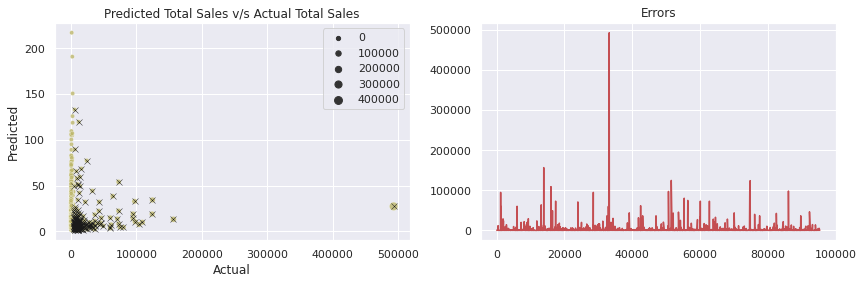

In [ ]:
#Predicted v/s Actual
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.scatterplot(result_p["Actual"], result_p["Predicted"], size = result_p["Error"], color = "darkkhaki", alpha = 0.8, marker = 'o')
sns.scatterplot((result_p[result_p["Error"] > 5000]["Actual"]), (result_p[result_p["Error"] > 5000]["Predicted"]), color = "k", marker = "x")
plt.title("Predicted Total Sales v/s Actual Total Sales")
plt.subplot(122)
plt.plot(result_p["Error"], color = "r")
plt.title("Errors")
plt.show()

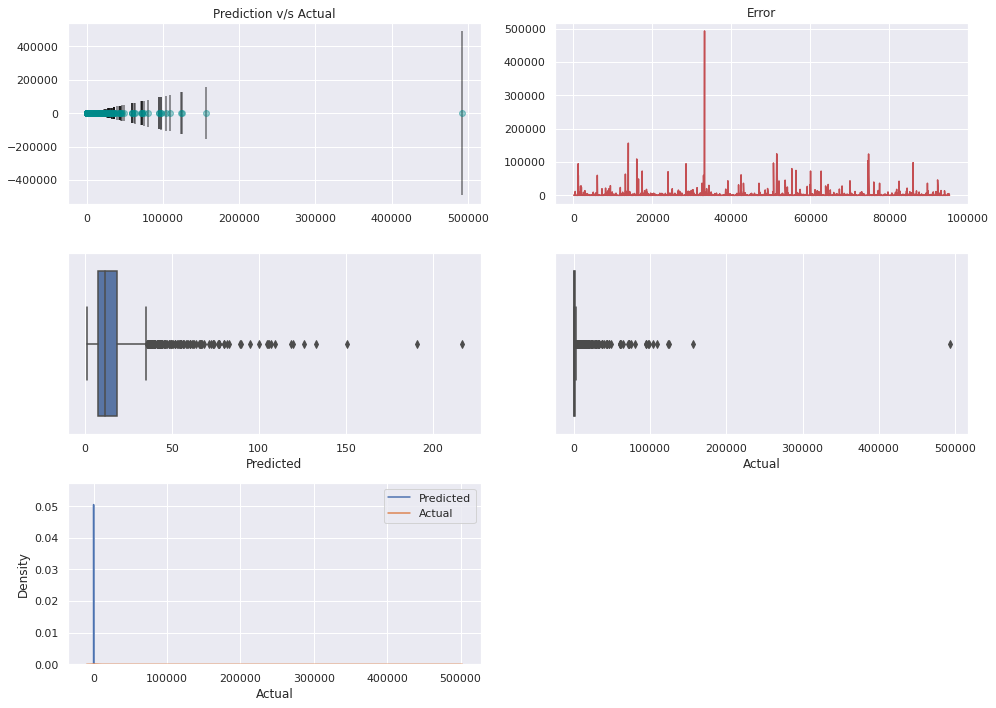

In [ ]:
plt.figure(figsize=(14,10))
plt.subplot(321)
plt.errorbar(result_p["Actual"], result_p["Predicted"], yerr=result_p["Error"], fmt='o', color='darkcyan',
             ecolor='black', elinewidth=2, capsize=0, alpha = 0.4);
plt.title("Prediction v/s Actual")
plt.subplot(322)
plt.plot(result_p["Error"], color = 'r')
plt.title("Error")
plt.subplot(323)
sns.boxplot(result_p["Predicted"])
plt.subplot(324)
sns.boxplot(result_p["Actual"])
plt.subplot(325)
sns.distplot(result_p["Predicted"])
sns.distplot(result_p["Actual"])
plt.legend(["Predicted", "Actual"])
plt.tight_layout()

In [ ]:
summary_copy["predicted_clv_p"] = ggf_p.customer_lifetime_value(pareto_nbd,
                                                       summary_copy["frequency"],
                                                       summary_copy["recency"],
                                                       summary_copy["T"],
                                                       summary_copy["monetary_value"],
                                                       time = 365,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [ ]:
summary_copy.shape


(2085, 12)

In [ ]:
summary_copy["CLV_p"] = summary_copy["predicted_clv_p"]*0.05


which customers have the highest spend probability in next 365-days?

In [ ]:
summary_copy.sort_values('predicted_purchases',ascending=False).head(10)


,customer_unique_id,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual_365_p,p_error,expected_avg_sales_p,predicted_clv_p,CLV_p
52597,8d50f5eadf50201ccdcedfb9e2ac8455,15.0,462.0,476.0,47.642000,0.013756,0.986244,2.110177,11.850649,9.740472,50.311521,503.478122,25.173906
75560,ca77025e7201e3b30c44b472ff346268,6.0,235.0,329.0,66.126667,0.157330,0.842670,0.780812,9.319149,8.538337,70.637595,245.048055,12.252403
82305,dc813062e0fc23409cd255f7f53c7074,5.0,418.0,429.0,75.552000,0.011569,0.988431,0.769240,4.366029,3.596788,79.795709,285.723682,14.286184
37532,6469f99c1f9dfae7733b25662e7f1782,5.0,282.0,349.0,106.880000,0.097296,0.902704,0.709609,6.471631,5.762022,107.576378,342.643416,17.132171
37320,63cfc61cee11cbe306bff5857d00bfe4,5.0,382.0,480.0,62.772000,0.107802,0.892198,0.687819,4.777487,4.089668,68.462813,223.654317,11.182716
89814,f0e310a6839dce9de1638e0fe5ab282a,5.0,320.0,471.0,42.218000,0.186709,0.813291,0.628114,5.703125,5.075011,50.236183,149.356588,7.467829
21432,394ac4de8f3acb14253c177f0e15bc58,4.0,236.0,255.0,106.150000,0.034010,0.965990,0.623731,6.186441,5.562710,107.096989,284.316059,14.215803
29302,4e65032f1f574189fb793bac5a867bbc,4.0,445.0,526.0,94.795000,0.077128,0.922872,0.579565,3.280899,2.701334,97.304932,272.308679,13.615434
94863,fe81bb32c243a86b2f86fbf053fe6140,4.0,242.0,316.0,369.850000,0.119209,0.880791,0.570534,6.033058,5.462524,334.500392,842.053453,42.102673
23302,3e43e6105506432c953e165fb2acf44c,5.0,162.0,350.0,156.650000,0.351435,0.648565,0.509794,11.265432,10.755638,151.710824,347.322845,17.366142


which customers have the lowest spend probability in next 365-days?

In [ ]:
summary_copy.sort_values('predicted_purchases',ascending=False).tail(10)

,customer_unique_id,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual_365_p,p_error,expected_avg_sales_p,predicted_clv_p,CLV_p
20327,36445bb429c8bb13c3f8cd6794723647,1.0,2.0,477.0,36.85,0.880889,0.119111,0.026714,182.5,182.473286,66.534929,8.432224,0.421611
54178,917de9fb824d070a7f1f4db097cbea8d,1.0,1.0,473.0,69.00,0.887881,0.112119,0.025166,365.0,364.974834,86.157096,10.270654,0.513533
55309,947c249c7f31f3eae2bd05454e1b2040,1.0,1.0,480.0,219.99,0.889094,0.110906,0.024858,365.0,364.975142,178.311096,21.052374,1.052619
32944,582183483d33018384b309d31c45f353,1.0,1.0,499.0,164.33,0.892267,0.107733,0.024052,365.0,364.975948,144.340027,16.604642,0.830232
93116,f9ae226291893fda10af7965268fb7f6,1.0,2.0,543.0,79.90,0.892007,0.107993,0.023875,182.5,182.476125,92.809713,10.761130,0.538057
14104,25a560b9a6006157838aab1bdbd68624,1.0,1.0,513.0,31.80,0.894500,0.105500,0.023482,365.0,364.976518,63.452753,7.162302,0.358115
81873,db539c729198334582efc7b53c803c79,1.0,1.0,518.0,49.90,0.895277,0.104723,0.023284,365.0,364.976716,74.499759,8.352726,0.417636
61897,a5d3bfee5b23b430b95c4ae295e1028a,1.0,2.0,590.0,9.90,0.898836,0.101164,0.022113,182.5,182.477887,50.086486,5.460568,0.273028
77536,cfdaaa0caea59b06efb4b0fb8c700684,1.0,1.0,550.0,99.90,0.900014,0.099986,0.022068,365.0,364.977932,105.016349,11.281328,0.564066
92379,f7b62c75467e8ce080b201667cbbc274,1.0,1.0,697.0,30.97,0.917614,0.082386,0.017512,365.0,364.982488,62.946178,5.601859,0.280093


#Purchase Prediction Result Summary

In [ ]:
indexes = ["MSE Purchase Error", "RMSE Purchase Error","Avg Purchase Error"]


In [ ]:

data = [[pareto_mse_purchase],
[pareto_rmse_purchase], [pareto_avg_error_purchase]]

In [ ]:
model_purchase_result = pd.DataFrame(data, columns = ["Pareto-NBD"], index = indexes)


In [ ]:
model_purchase_result

,Pareto-NBD
MSE Purchase Error,86.218534
RMSE Purchase Error,9.285394
Avg Purchase Error,0.480401


# Churn Risk

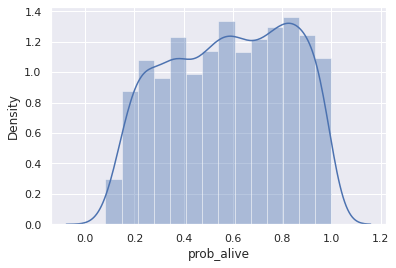

In [ ]:
df = rfm_summary[rfm_summary['frequency']>0]
df['prob_alive'] = pareto_nbd.conditional_probability_alive(df['frequency'],df['recency'],df['T'])
sns.distplot(df['prob_alive'])

In [ ]:
df.head()


,customer_unique_id,frequency,recency,T,monetary_value,prob_alive
106,004288347e5e88a27ded2bb23747066c,1.0,171.0,403.0,87.90,0.663668
123,004b45ec5c64187465168251cd1c9c2f,1.0,267.0,367.0,27.00,0.864782
143,0058f300f57d7b93c477a131a59b36c3,1.0,31.0,196.0,72.58,0.443139
246,00a39521eb40f7012db50455bf083460,1.0,11.0,103.0,11.55,0.419816
410,011575986092c30523ecb71ff10cb473,1.0,60.0,198.0,63.90,0.585362


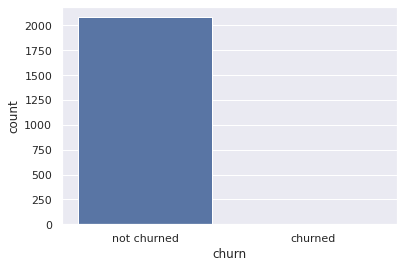

In [ ]:
df['churn'] = ['churned' if p < 0.1 else 'not churned' for p in df['prob_alive']]
sns.countplot(df['churn'])

In [ ]:
df['churn'][(df['prob_alive']>=0.1) & (df['prob_alive']<0.2)] = "high risk"
df['churn'].value_counts()

not churned    1951
high risk       132
churned           2
Name: churn, dtype: int64

#Action and Recomendation

not churned:


1.   Reward Customers
2.   Serve them additional benefits to ensure that they remain loyal customers(VIP).

high risk:


1.   Identify what happens when a customer defects.
2.   Set up alerts to get more details.
3.   Know the ideal customer journey.
4.   Don’t be afraid of the exit interview.
5.   Treat former customers like friends, not enemies.

churned:


1.   Give better service
2.   Pay attention to complaints




